In [1]:
import pandas as pd

#Clean up data by replacing any missing data with Zero or drop the rows.
df = pd.read_csv('D:\\College\\Year4\\RD\\bike_sales.csv', na_values=['0'])
df

,Sale_ID,Date,Customer_ID,Bike_Model,Category,Price,Quantity,Discount,Store_Location,Salesperson_ID,Payment_Method,Channel,Customer_Age,Customer_Gender
0,1,7/11/2022,9390.0,Cruiser,Off Road,318.32,1.0,no,Philadelphia,589,Apple Pay,Online,70.0,Female
1,2,5/3/2024,3374.0,Hybrid Bike,Hybrid,3093.47,4.0,yes,Chicago,390,Apple Pay,Online,37.0,Male
2,3,9/1/2022,2689.0,Folding Bike,Road,4247.99,3.0,yes,San Antonio,338,PayPal,Online,59.0,Female
3,4,9/28/2022,3797.0,Mountain Bike,Off Road,1722.01,3.0,no,San Antonio,352,Apple Pay,Online,19.0,Male
4,5,1/5/2021,1633.0,BMX,Off Road,3941.44,3.0,yes,Philadelphia,580,PayPal,Online,67.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,11175,7/27/2022,8653.0,Hybrid Bike,Hybrid,1101.59,5.0,yes,New York,999,Cash,Store,26.0,Female
11175,11176,10/5/2023,4824.0,Mountain Bike,Off Road,4653.74,3.0,no,Philadelphia,180,Credit Card,Online,19.0,Male
11176,11177,5/16/2023,9483.0,Cruiser,Off Road,2784.90,5.0,yes,Chicago,160,Google Pay,Online,29.0,Female
11177,11178,6/26/2023,7725.0,Road Bike,Road,3228.88,2.0,yes,Houston,184,PayPal,Online,56.0,Female


In [2]:
# list top 3 salespeople in Sales for each city.
# Create a calculated cloumn called 'Sale Amount' (Price * Quantity) for each product.

df['Sale_Amount'] = df['Quantity'] * df['Price']

grouped_df = df.groupby(['Store_Location', 'Salesperson_ID'])['Sale_Amount'].sum().reset_index()
# grouped_df

sorted_df = grouped_df.sort_values(['Store_Location', 'Sale_Amount'], ascending=[True, False])
# sorted_df

top3_salespeople = sorted_df.groupby('Store_Location').head(3)
top3_salespeople

,Store_Location,Salesperson_ID,Sale_Amount
237,Chicago,377,87787.15
696,Chicago,920,67940.70
29,Chicago,131,60550.84
1108,Houston,510,65232.05
1098,Houston,500,59204.14
822,Houston,175,57535.43
1619,Los Angeles,244,66884.30
1657,Los Angeles,293,66085.02
1867,Los Angeles,543,64583.77
2774,New York,712,79432.55


In [3]:
city_sales_sum = df.groupby('Store_Location')['Sale_Amount'].sum().sort_values(ascending=False).reset_index()
city_sales_sum

,Store_Location,Sale_Amount
0,Phoenix,12812527.47
1,New York,12674323.66
2,Chicago,12669615.46
3,Los Angeles,12577138.64
4,San Antonio,12517596.46
5,Philadelphia,12324139.17
6,Houston,11941383.05


In [4]:
#Create a calculated cloumn called 'Sale Amount' (Price * Quantity) for each product.
df_sum = df
df_sum['Sale_Amount'] = df_sum['Price'] * df_sum['Quantity']

# df_sum
df_sum.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Category,Price,Quantity,Discount,Store_Location,Salesperson_ID,Payment_Method,Channel,Customer_Age,Customer_Gender,Sale_Amount
0,1,7/11/2022,9390.0,Cruiser,Off Road,318.32,1.0,no,Philadelphia,589,Apple Pay,Online,70.0,Female,318.32
1,2,5/3/2024,3374.0,Hybrid Bike,Hybrid,3093.47,4.0,yes,Chicago,390,Apple Pay,Online,37.0,Male,12373.88
2,3,9/1/2022,2689.0,Folding Bike,Road,4247.99,3.0,yes,San Antonio,338,PayPal,Online,59.0,Female,12743.97
3,4,9/28/2022,3797.0,Mountain Bike,Off Road,1722.01,3.0,no,San Antonio,352,Apple Pay,Online,19.0,Male,5166.03
4,5,1/5/2021,1633.0,BMX,Off Road,3941.44,3.0,yes,Philadelphia,580,PayPal,Online,67.0,Female,11824.32


In [5]:
# Using groupby, display the top 5 Sales for each Category and Bike.
df_groups = df_sum.groupby(['Category', 'Bike_Model'])['Sale_Amount'].nlargest(5).reset_index()

# df_groups
df_groups.head(10)

,Category,Bike_Model,level_2,Sale_Amount
0,Electric,Electric Bike,7750,24979.85
1,Electric,Electric Bike,3254,24978.20
2,Electric,Electric Bike,7008,24892.25
3,Electric,Electric Bike,2158,24890.00
4,Electric,Electric Bike,5240,24843.55
5,Hybrid,Hybrid Bike,2933,24918.20
6,Hybrid,Hybrid Bike,2389,24867.00
7,Hybrid,Hybrid Bike,8091,24825.00
8,Hybrid,Hybrid Bike,6818,24802.80
9,Hybrid,Hybrid Bike,3269,24725.25


In [6]:
# Using a pivot table, show the sum and mean of ‘Price’ in terms of Segment and Category. 
df_pivot = pd.pivot_table(df, values='Price', index=['Channel', 'Category'], aggfunc={"Price": ["sum", "mean"]}).round(2)

df_pivot

mean         sum
Channel Category                     
Online  Electric  2583.91  2744108.10
        Hybrid    2647.57  2732296.67
        Off Road  2569.68  8148464.96
        Road      2580.15  5498309.71
Store   Electric  2578.90  1431290.82
        Hybrid    2524.48  1332927.10
        Off Road  2650.14  4123623.48
        Road      2570.27  2906972.29

In [7]:
# Filter for Cruisers in Chicago sold by salesperson 782 in 2024 and above $2000
df_filtered = df[
    (df['Bike_Model'] == 'Cruiser') &
    (df['Store_Location'] == 'Chicago') &
    (df['Price'] > 2000) &
    (df['Salesperson_ID'] == 782) &
    (df['Date'].str.contains('2024'))
]

df_filtered

,Sale_ID,Date,Customer_ID,Bike_Model,Category,Price,Quantity,Discount,Store_Location,Salesperson_ID,Payment_Method,Channel,Customer_Age,Customer_Gender,Sale_Amount
83,84,6/29/2024,8722.0,Cruiser,Off Road,2834.10,2.0,no,Chicago,782,Credit Card,Online,26.0,Male,5668.2
2087,2088,3/12/2024,2490.0,Cruiser,Off Road,2536.95,2.0,no,Chicago,782,Apple Pay,Online,23.0,Female,5073.9


In [8]:
# Filter for hybrid bike sales, in-store channel, customers aged 50-60, with a discount in 2023
df_filtered = df[
    (df['Bike_Model'] == 'Hybrid Bike') &
    (df['Channel'] == 'Store') &
    (df['Discount'] == 'yes') &
    (df['Customer_Age'].between(50,60)) &
    (df['Date'].str.contains('2023'))
]

df_filtered

,Sale_ID,Date,Customer_ID,Bike_Model,Category,Price,Quantity,Discount,Store_Location,Salesperson_ID,Payment_Method,Channel,Customer_Age,Customer_Gender,Sale_Amount
139,140,10/24/2023,3044.0,Hybrid Bike,Hybrid,1241.87,1.0,yes,Houston,412,Cash,Store,60.0,Male,1241.87
885,886,11/4/2023,8233.0,Hybrid Bike,Hybrid,2126.25,2.0,yes,San Antonio,334,Debit Card,Store,52.0,Female,4252.50
1082,1083,4/13/2023,1762.0,Hybrid Bike,Hybrid,1287.69,5.0,yes,New York,323,Debit Card,Store,57.0,Female,6438.45
1538,1539,8/9/2023,1974.0,Hybrid Bike,Hybrid,3812.06,5.0,yes,Los Angeles,302,Cash,Store,60.0,Female,19060.30
2098,2099,6/21/2023,1636.0,Hybrid Bike,Hybrid,1193.52,3.0,yes,Houston,584,Debit Card,Store,57.0,Male,3580.56
2542,2543,3/23/2023,5512.0,Hybrid Bike,Hybrid,3080.59,3.0,yes,San Antonio,772,Debit Card,Store,53.0,Male,9241.77
2710,2711,9/23/2023,7127.0,Hybrid Bike,Hybrid,3892.85,2.0,yes,Los Angeles,562,Debit Card,Store,54.0,Male,7785.70
3518,3519,5/3/2023,8019.0,Hybrid Bike,Hybrid,1110.67,1.0,yes,San Antonio,137,Cash,Store,53.0,Female,1110.67
3586,3587,5/2/2023,1633.0,Hybrid Bike,Hybrid,2495.97,1.0,yes,Houston,212,Cash,Store,51.0,Female,2495.97
4858,4859,1/23/2023,7564.0,Hybrid Bike,Hybrid,4166.79,2.0,yes,Chicago,815,Debit Card,Store,55.0,Male,8333.58


In [9]:
# Group by 'Salesperson_ID' and sum their commissions, then find top 5
df['Commission'] = df['Sale_Amount'] * 0.05

df_commission = (df
                    .groupby('Salesperson_ID')['Commission']
                    .sum()
                    .sort_values(ascending=False)
                    .head(5)
                    .reset_index()
                )

df_commission

,Salesperson_ID,Commission
0,197,11609.6085
1,563,11315.7530
2,117,10637.2465
3,400,10538.7105
4,229,10283.9510


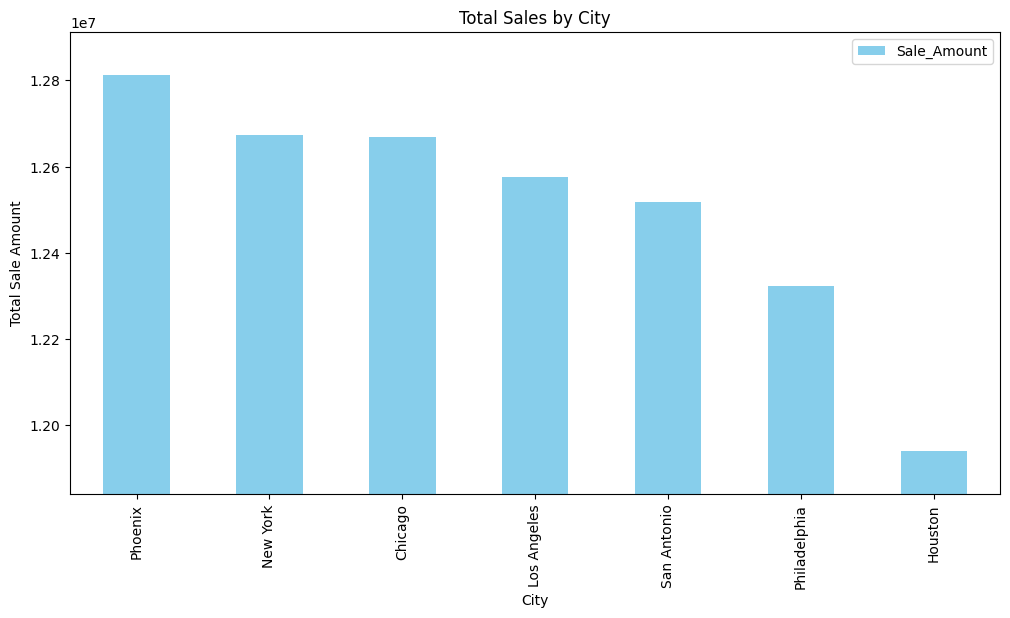

,Store_Location,Sale_Amount
0,Phoenix,12812527.47
1,New York,12674323.66
2,Chicago,12669615.46
3,Los Angeles,12577138.64
4,San Antonio,12517596.46
5,Philadelphia,12324139.17
6,Houston,11941383.05


In [10]:
import matplotlib.pyplot as plt

df_vis = city_sales_sum
df_vis.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.xticks(range(len(df_vis['Store_Location'])), df_vis['Store_Location'])
plt.ylim((11841383, 12912527))
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sale Amount")
plt.show()

# print(city_sales_sum)
df.to_csv("Q1.csv", index=False)
df_vis